In [1]:
import re
import pickle
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from datetime import date, datetime
from sklearn.impute import SimpleImputer
from IPython.core.display import display, HTML
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
display(HTML('<style>.container{width : 100% ! important;}</style>'))

In [2]:
df = pd.read_csv('IPL 2nd Innings.csv')

In [3]:
df.head()

,match_id,year,date,city,venue,team1,team2,toss_winner,toss_decision,innings,batting_team,bowling_team,batsman,non_striker,bowler,overs,balls,ball_no,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,runs,wickets,runs_last_5_overs,wickets_last_5_overs,winner,result,result_margin,player_of_match,playoff,knockout,final,method,players,umpire1,umpire2,final_score,total_wickets,target_overs,target_runs,won
0,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,0,1,1,1,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
1,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,2,2,0,1,1,0,0,NaN,NaN,NaN,wides,2,0,2,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
2,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,3,2,0,0,0,0,0,NaN,NaN,NaN,NaN,2,0,2,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
3,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,4,3,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,3,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
4,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,0,5,4,1,0,1,0,0,NaN,NaN,NaN,NaN,4,0,4,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0


In [4]:
df.shape

(100217, 47)

In [5]:
df = df[df['overs'] > 4]

In [6]:
df.shape

(72949, 47)

In [7]:
df.head()

,match_id,year,date,city,venue,team1,team2,toss_winner,toss_decision,innings,batting_team,bowling_team,batsman,non_striker,bowler,overs,balls,ball_no,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,runs,wickets,runs_last_5_overs,wickets_last_5_overs,winner,result,result_margin,player_of_match,playoff,knockout,final,method,players,umpire1,umpire2,final_score,total_wickets,target_overs,target_runs,won
32,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,CL White,AB Dinda,5,1,31,0,0,0,0,0,NaN,NaN,NaN,NaN,24,3,22,3,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
33,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,CL White,AB Dinda,5,2,32,0,0,0,0,1,71508.0,W Jaffer,RT Ponting,NaN,24,4,21,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
34,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Dinda,5,3,33,0,0,0,0,0,NaN,NaN,NaN,NaN,24,4,20,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
35,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Dinda,5,4,34,1,0,1,0,0,NaN,NaN,NaN,NaN,25,4,21,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
36,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,CL White,MV Boucher,AB Dinda,5,5,35,1,0,1,0,0,NaN,NaN,NaN,NaN,26,4,22,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0


In [8]:
df = df[['year', 'venue', 'toss_decision', 'batting_team', 'bowling_team', 'overs', 'ball_no', 'runs', 'wickets', 'runs_last_5_overs', 
         'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'winner', 'target_overs', 'target_runs', 'won']]

In [9]:
df.head()

,year,venue,toss_decision,batting_team,bowling_team,overs,ball_no,runs,wickets,runs_last_5_overs,wickets_last_5_overs,playoff,knockout,final,winner,target_overs,target_runs,won
32,2008,M Chinnaswamy Stadium,field,Royal Challengers Bangalore,Kolkata Knight Riders,5,31,24,3,22,3,0,0,0,Kolkata Knight Riders,20.0,223,0
33,2008,M Chinnaswamy Stadium,field,Royal Challengers Bangalore,Kolkata Knight Riders,5,32,24,4,21,4,0,0,0,Kolkata Knight Riders,20.0,223,0
34,2008,M Chinnaswamy Stadium,field,Royal Challengers Bangalore,Kolkata Knight Riders,5,33,24,4,20,4,0,0,0,Kolkata Knight Riders,20.0,223,0
35,2008,M Chinnaswamy Stadium,field,Royal Challengers Bangalore,Kolkata Knight Riders,5,34,25,4,21,4,0,0,0,Kolkata Knight Riders,20.0,223,0
36,2008,M Chinnaswamy Stadium,field,Royal Challengers Bangalore,Kolkata Knight Riders,5,35,26,4,22,4,0,0,0,Kolkata Knight Riders,20.0,223,0


In [10]:
dummy = ['venue', 'toss_decision', 'batting_team', 'bowling_team']
df_dummy = pd.get_dummies(df[dummy], prefix_sep = '_', drop_first = False)
df = df.drop(dummy, axis = 1)
df = pd.concat([df, df_dummy], axis = 1)

In [11]:
df.head()

,year,overs,ball_no,runs,wickets,runs_last_5_overs,wickets_last_5_overs,playoff,knockout,final,winner,target_overs,target_runs,won,venue_Arun Jaitley Stadium,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Green Park,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_Kingsmead,venue_M Chinnaswamy Stadium,venue_MA Chidambaram Stadium,venue_Maharashtra Cricket Association Stadium,venue_Narendra Modi Stadium,venue_Nehru Stadium,venue_New Wanderers Stadium,venue_Newlands,venue_OUTsurance Oval,venue_Punjab Cricket Association IS Bindra Stadium,venue_Rajiv Gandhi International Stadium,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_SuperSport Park,venue_Vidarbha Cricket Association Stadium,venue_Wankhede Stadium,toss_decision_bat,toss_decision_field,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Gujarat Lions,batting_team_Kochi Tuskers Kerala,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Pune Warriors,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Rising Pune Supergiant,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Deccan Chargers,bowling_team_Delhi Capitals,bowling_team_Gujarat Lions,bowling_team_Kochi Tuskers Kerala,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Rising Pune Supergiant,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,2008,5,31,24,3,22,3,0,0,0,Kolkata Knight Riders,20.0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33,2008,5,32,24,4,21,4,0,0,0,Kolkata Knight Riders,20.0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34,2008,5,33,24,4,20,4,0,0,0,Kolkata Knight Riders,20.0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35,2008,5,34,25,4,21,4,0,0,0,Kolkata Knight Riders,20.0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36,2008,5,35,26,4,22,4,0,0,0,Kolkata Knight Riders,20.0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
df.shape

(72949, 75)

In [13]:
columns = []
for i in df.columns:
    i = re.sub('\s', '_', i)
    i = re.sub('\.', '', i)
    i = re.sub('\,', '', i)
    i = re.sub('\-', '_', i)
    columns.append(i)
df.columns = columns

In [14]:
df.columns

Index(['year', 'overs', 'ball_no', 'runs', 'wickets', 'runs_last_5_overs',
       'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'winner',
       'target_overs', 'target_runs', 'won', 'venue_Arun_Jaitley_Stadium',
       'venue_Barabati_Stadium', 'venue_Brabourne_Stadium',
       'venue_Buffalo_Park', 'venue_De_Beers_Diamond_Oval',
       'venue_Dr_DY_Patil_Sports_Academy',
       'venue_Dr_YS_Rajasekhara_Reddy_ACA_VDCA_Cricket_Stadium',
       'venue_Dubai_International_Cricket_Stadium', 'venue_Eden_Gardens',
       'venue_Green_Park',
       'venue_Himachal_Pradesh_Cricket_Association_Stadium',
       'venue_Holkar_Cricket_Stadium',
       'venue_JSCA_International_Stadium_Complex', 'venue_Kingsmead',
       'venue_M_Chinnaswamy_Stadium', 'venue_MA_Chidambaram_Stadium',
       'venue_Maharashtra_Cricket_Association_Stadium',
       'venue_Narendra_Modi_Stadium', 'venue_Nehru_Stadium',
       'venue_New_Wanderers_Stadium', 'venue_Newlands',
       'venue_OUTsurance_Oval',
   

In [15]:
df = df[['year', 'batting_team_Chennai_Super_Kings', 'batting_team_Deccan_Chargers', 'batting_team_Delhi_Capitals', 
         'batting_team_Gujarat_Lions', 'batting_team_Kochi_Tuskers_Kerala', 'batting_team_Kolkata_Knight_Riders', 
         'batting_team_Mumbai_Indians', 'batting_team_Pune_Warriors', 'batting_team_Punjab_Kings', 'batting_team_Rajasthan_Royals', 
         'batting_team_Rising_Pune_Supergiant', 'batting_team_Royal_Challengers_Bangalore', 'batting_team_Sunrisers_Hyderabad', 
         'bowling_team_Chennai_Super_Kings', 'bowling_team_Deccan_Chargers', 'bowling_team_Delhi_Capitals', 'bowling_team_Gujarat_Lions', 
         'bowling_team_Kochi_Tuskers_Kerala', 'bowling_team_Kolkata_Knight_Riders', 'bowling_team_Mumbai_Indians', 
         'bowling_team_Pune_Warriors', 'bowling_team_Punjab_Kings', 'bowling_team_Rajasthan_Royals', 'bowling_team_Rising_Pune_Supergiant', 
         'bowling_team_Royal_Challengers_Bangalore', 'bowling_team_Sunrisers_Hyderabad', 'toss_decision_bat', 'toss_decision_field', 
         'venue_Arun_Jaitley_Stadium', 'venue_Barabati_Stadium', 'venue_Brabourne_Stadium', 'venue_Buffalo_Park', 
         'venue_De_Beers_Diamond_Oval', 'venue_Dr_DY_Patil_Sports_Academy', 'venue_Dr_YS_Rajasekhara_Reddy_ACA_VDCA_Cricket_Stadium', 
         'venue_Dubai_International_Cricket_Stadium', 'venue_Eden_Gardens', 'venue_Green_Park', 
         'venue_Himachal_Pradesh_Cricket_Association_Stadium', 'venue_Holkar_Cricket_Stadium', 'venue_JSCA_International_Stadium_Complex', 
         'venue_Kingsmead', 'venue_M_Chinnaswamy_Stadium', 'venue_MA_Chidambaram_Stadium', 'venue_Maharashtra_Cricket_Association_Stadium', 
         'venue_Narendra_Modi_Stadium', 'venue_Nehru_Stadium', 'venue_New_Wanderers_Stadium', 'venue_Newlands', 'venue_OUTsurance_Oval', 
         'venue_Punjab_Cricket_Association_IS_Bindra_Stadium', 'venue_Rajiv_Gandhi_International_Stadium', 
         'venue_Saurashtra_Cricket_Association_Stadium', 'venue_Sawai_Mansingh_Stadium', 
         'venue_Shaheed_Veer_Narayan_Singh_International_Stadium', 'venue_Sharjah_Cricket_Stadium', 'venue_Sheikh_Zayed_Stadium', 
         'venue_St_George\'s_Park', 'venue_SuperSport_Park', 'venue_Vidarbha_Cricket_Association_Stadium', 'venue_Wankhede_Stadium', 'overs', 
         'ball_no', 'runs', 'wickets', 'runs_last_5_overs', 'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'target_overs', 'target_runs', 'won']]

In [16]:
train = df[df['year'] <= 2019]
test = df[df['year'] >= 2020]

In [17]:
train.year.unique(), test.year.unique()

(array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
        2019], dtype=int64),
 array([2020, 2021], dtype=int64))

In [18]:
X_train = pd.DataFrame(train.drop(['year', 'won'], axis = 1), columns = train.drop(['year', 'won'], axis = 1).columns)
X_test = pd.DataFrame(test.drop(['year', 'won'], axis = 1), columns = test.drop(['year', 'won'], axis = 1).columns)
y_train = train['won']
y_test = test['won']

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62694, 72), (10255, 72), (62694,), (10255,))

In [20]:
X_train.columns

Index(['batting_team_Chennai_Super_Kings', 'batting_team_Deccan_Chargers',
       'batting_team_Delhi_Capitals', 'batting_team_Gujarat_Lions',
       'batting_team_Kochi_Tuskers_Kerala',
       'batting_team_Kolkata_Knight_Riders', 'batting_team_Mumbai_Indians',
       'batting_team_Pune_Warriors', 'batting_team_Punjab_Kings',
       'batting_team_Rajasthan_Royals', 'batting_team_Rising_Pune_Supergiant',
       'batting_team_Royal_Challengers_Bangalore',
       'batting_team_Sunrisers_Hyderabad', 'bowling_team_Chennai_Super_Kings',
       'bowling_team_Deccan_Chargers', 'bowling_team_Delhi_Capitals',
       'bowling_team_Gujarat_Lions', 'bowling_team_Kochi_Tuskers_Kerala',
       'bowling_team_Kolkata_Knight_Riders', 'bowling_team_Mumbai_Indians',
       'bowling_team_Pune_Warriors', 'bowling_team_Punjab_Kings',
       'bowling_team_Rajasthan_Royals', 'bowling_team_Rising_Pune_Supergiant',
       'bowling_team_Royal_Challengers_Bangalore',
       'bowling_team_Sunrisers_Hyderabad', 'to

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Logistic Regression:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.8458385172424794
Test accuracy_score:  0.7668454412481717
----------------------------------------------------------------------------------------------------
Train f1_score:  0.812158669076633
Test f1_score:  0.7378576910426488
----------------------------------------------------------------------------------------------------
Train precision_score:  0.8080284631448681
Test precision_score:  0.8273911974428325
----------------------------------------------------------------------------------------------------
Train recall_score:  0.8163313147099043
Test recall_score:  0.6658092599920855


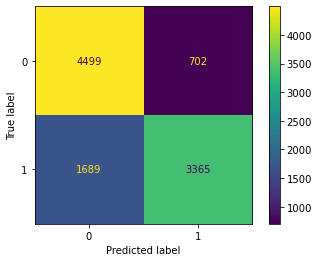

In [23]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
print('Logistic Regression:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_lr))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_lr))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_lr))
print('Test f1_score: ', f1_score(y_test, y_test_pred_lr))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_lr))
print('Test precision_score: ', precision_score(y_test, y_test_pred_lr))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_lr))
print('Test recall_score: ', recall_score(y_test, y_test_pred_lr))
plot_confusion_matrix(lr, X_test, y_test)

In [24]:
dtc = DecisionTreeClassifier()
possible_parameter_values = {'criterion' : ['gini', 'entropy'],
                            'splitter' : ['best', 'random'],
                            'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                            'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                            'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
dtc_rscv = RandomizedSearchCV(estimator = dtc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, 
                              n_jobs = 1)
dtc_rscv.fit(X_train, y_train)
dtc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=80, min_samples_leaf=23, min_samples_split=81, splitter=random; total time= 

[CV] END criterion=entropy, max_depth=80, min_samples_leaf=31, min_samples_split=74, splitter=random; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_samples_split=10, splitter=best; total time=   0.2s
[CV] END criterion=gini, max_depth=85, min_samples_leaf=38, min_sam

{'splitter': 'best',
 'min_samples_split': 24,
 'min_samples_leaf': 18,
 'max_depth': 10,
 'criterion': 'entropy'}

Decision Tree Classifier:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.8544836826490573
Test accuracy_score:  0.7063871282301316
----------------------------------------------------------------------------------------------------
Train f1_score:  0.8156709029559736
Test f1_score:  0.6423565744150137
----------------------------------------------------------------------------------------------------
Train precision_score:  0.8446313499037577
Test precision_score:  0.8035661218424963
----------------------------------------------------------------------------------------------------
Train recall_score:  0.7886305919124829
Test recall_score:  0.5350217649386625


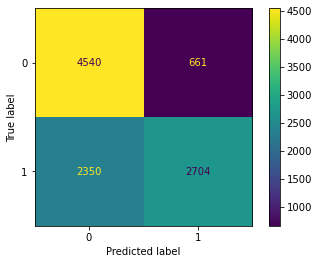

In [28]:
y_train_pred_dtc = dtc_rscv.predict(X_train)
y_test_pred_dtc = dtc_rscv.predict(X_test)
print('Decision Tree Classifier:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_dtc))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_dtc))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_dtc))
print('Test f1_score: ', f1_score(y_test, y_test_pred_dtc))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_dtc))
print('Test precision_score: ', precision_score(y_test, y_test_pred_dtc))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_dtc))
print('Test recall_score: ', recall_score(y_test, y_test_pred_dtc))
plot_confusion_matrix(dtc_rscv, X_test, y_test)

In [29]:
rfc = RandomForestClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                            'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                            'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                            'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)], 
                            'criterion' : ['gini', 'entropy']}
rfc_rscv = RandomizedSearchCV(estimator = rfc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, 
                              n_jobs = 1)
rfc_rscv.fit(X_train, y_train)
rfc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.6s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.3s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.8s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  20.0s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.7s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.4s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_split=88, n_estimators=500; total time=  19.8s
[CV] END criterion=entropy, max_depth=100, min_samples_leaf=27, min_samples_

[CV] END criterion=entropy, max_depth=35, min_samples_leaf=8, min_samples_split=46, n_estimators=650; total time=  27.9s
[CV] END criterion=entropy, max_depth=35, min_samples_leaf=8, min_samples_split=46, n_estimators=650; total time=  27.4s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  13.7s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  13.5s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  14.2s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  13.8s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  14.0s
[CV] END criterion=gini, max_depth=95, min_samples_leaf=18, min_samples_split=70, n_estimators=350; total time=  13.6s
[CV] END criterion=gini, max_depth=95, min_s

{'n_estimators': 650,
 'min_samples_split': 46,
 'min_samples_leaf': 8,
 'max_depth': 35,
 'criterion': 'entropy'}

Decision Tree Classifier:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.9973203177337544
Test accuracy_score:  0.7108727450024378
----------------------------------------------------------------------------------------------------
Train f1_score:  0.9967164412477523
Test f1_score:  0.66063866315669
----------------------------------------------------------------------------------------------------
Train precision_score:  0.9972231999687121
Test precision_score:  0.7836003258213413
----------------------------------------------------------------------------------------------------
Train recall_score:  0.9962101973041609
Test recall_score:  0.5710328452710725


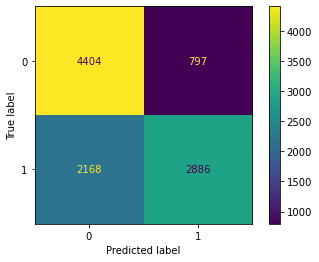

In [30]:
y_train_pred_rfc = rfc_rscv.predict(X_train)
y_test_pred_rfc = rfc_rscv.predict(X_test)
print('Decision Tree Classifier:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_rfc))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_rfc))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_rfc))
print('Test f1_score: ', f1_score(y_test, y_test_pred_rfc))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_rfc))
print('Test precision_score: ', precision_score(y_test, y_test_pred_rfc))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_rfc))
print('Test recall_score: ', recall_score(y_test, y_test_pred_rfc))
plot_confusion_matrix(rfc_rscv, X_test, y_test)

In [31]:
abc = AdaBoostClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
abr_rscv = RandomizedSearchCV(estimator = abc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, 
                              n_jobs = 1)
abr_rscv.fit(X_train, y_train)
abr_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.9s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.9s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  51.9s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.3s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.1s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.6s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.7s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.8s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.7s
[CV] END ...............learning_rate=0.85, n_estimators=950; total time=  52.9s
[CV] END .............learning_rate=0.313, n_estimators=1000; total time=  55.5s
[CV] END .............learning_rate=0.313, n_e

{'n_estimators': 50, 'learning_rate': 0.802}

Ada Boost Classifier:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.8504322582703289
Test accuracy_score:  0.7547537786445636
----------------------------------------------------------------------------------------------------
Train f1_score:  0.820098612896418
Test f1_score:  0.7234744365035733
----------------------------------------------------------------------------------------------------
Train precision_score:  0.8056770205066345
Test precision_score:  0.8141549121504578
----------------------------------------------------------------------------------------------------
Train recall_score:  0.8350459074037898
Test recall_score:  0.6509695290858726


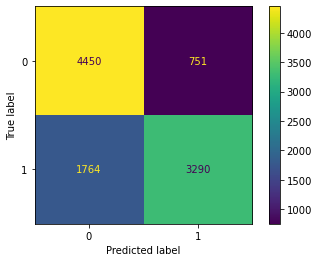

In [33]:
y_train_pred_abc = abr_rscv.predict(X_train)
y_test_pred_abc = abr_rscv.predict(X_test)
print('Ada Boost Classifier:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_abc))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_abc))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_abc))
print('Test f1_score: ', f1_score(y_test, y_test_pred_abc))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_abc))
print('Test precision_score: ', precision_score(y_test, y_test_pred_abc))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_abc))
print('Test recall_score: ', recall_score(y_test, y_test_pred_abc))
plot_confusion_matrix(abr_rscv, X_test, y_test)

In [34]:
knc = KNeighborsClassifier()
possible_parameter_values = {'weights' : ['uniform', 'distance'],
                             'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 11, step = 1)], 
                             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
knc_rscv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, 
                              n_jobs = 1)
knc_rscv.fit(X_train, y_train)
knc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.2s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.1s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.2s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.1s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.2s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.1s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.4s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.5s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   5.0s
[CV] END ....algorithm=auto, n_neighbors=8, weights=distance; total time=   4.4s
[CV] END ..algorithm=kd_tree, n_neighbors=6, weights=uniform; total time=   1.0s
[CV] END ..algorithm=kd_tree, n_neighbors=6, w

{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}

K Neighbors Classifier:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.8504322582703289
Test accuracy_score:  0.7547537786445636
----------------------------------------------------------------------------------------------------
Train f1_score:  0.820098612896418
Test f1_score:  0.7234744365035733
----------------------------------------------------------------------------------------------------
Train precision_score:  0.8056770205066345
Test precision_score:  0.8141549121504578
----------------------------------------------------------------------------------------------------
Train recall_score:  0.8350459074037898
Test recall_score:  0.6509695290858726


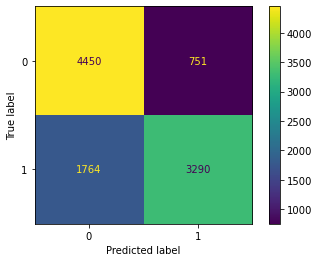

In [35]:
y_train_pred_knc = abr_rscv.predict(X_train)
y_test_pred_knc = abr_rscv.predict(X_test)
print('K Neighbors Classifier:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_knc))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_knc))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_knc))
print('Test f1_score: ', f1_score(y_test, y_test_pred_knc))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_knc))
print('Test precision_score: ', precision_score(y_test, y_test_pred_knc))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_knc))
print('Test recall_score: ', recall_score(y_test, y_test_pred_knc))
plot_confusion_matrix(abr_rscv, X_test, y_test)

In [37]:
xgbc = XGBClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)], 
                             'use_label_encoder' : [True, False], 
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)], 
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
xgbc_rscv = RandomizedSearchCV(estimator = xgbc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, 
                               n_jobs = 1)
xgbc_rscv.fit(X_train, y_train)
xgbc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[18:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.489, max_depth=75, n_estimators=400, use_label_encoder=False; total time=  11.7s
[18:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.489, max_depth=75, n_estimators=400, use_label_encoder=False; total time=  12.2s
[18:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Sta

[CV] END learning_rate=0.174, max_depth=90, n_estimators=250, use_label_encoder=True; total time=  14.1s
[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.358, max_depth=45, n_estimators=100, use_label_encoder=False; total time=   6.2s
[18:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.358, max_depth=45, n_estimators=100, use_label_encoder=False; total time=   6.1s
[18:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV] END learning_rate=0.546, max_depth=45, n_estimators=150, use_label_encoder=False; total time=   6.8s
[18:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.304, max_depth=30, n_estimators=500, use_label_encoder=True; total time=  20.4s
[18:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.304, max_depth=30, n_estimators=500, use_label_encoder=True; total time=  19.7s
[18:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win

[CV] END learning_rate=0.77, max_depth=30, n_estimators=350, use_label_encoder=True; total time=  11.1s
[18:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.593, max_depth=90, n_estimators=100, use_label_encoder=False; total time=   5.2s
[18:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.593, max_depth=90, n_estimators=100, use_label_encoder=False; total time=   5.1s
[18:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win

[CV] END learning_rate=0.519, max_depth=65, n_estimators=700, use_label_encoder=False; total time=  21.2s
[18:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.303, max_depth=65, n_estimators=850, use_label_encoder=False; total time=  29.2s
[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.303, max_depth=65, n_estimators=850, use_label_encoder=False; total time=  28.6s
[18:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-w

[CV] END learning_rate=0.137, max_depth=75, n_estimators=200, use_label_encoder=True; total time=  16.3s
[20:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'use_label_encoder': False,
 'n_estimators': 850,
 'max_depth': 65,
 'learning_rate': 0.303}

XG Boost Classifier:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.8504322582703289
Test accuracy_score:  0.7547537786445636
----------------------------------------------------------------------------------------------------
Train f1_score:  0.820098612896418
Test f1_score:  0.7234744365035733
----------------------------------------------------------------------------------------------------
Train precision_score:  0.8056770205066345
Test precision_score:  0.8141549121504578
----------------------------------------------------------------------------------------------------
Train recall_score:  0.8350459074037898
Test recall_score:  0.6509695290858726


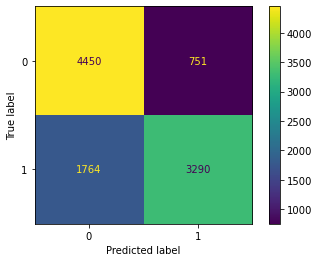

In [38]:
y_train_pred_xgbc = abr_rscv.predict(X_train)
y_test_pred_xgbc = abr_rscv.predict(X_test)
print('XG Boost Classifier:')
print('-' * 100)
print('Train accuracy_score: ', accuracy_score(y_train, y_train_pred_xgbc))
print('Test accuracy_score: ', accuracy_score(y_test, y_test_pred_xgbc))
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_xgbc))
print('Test f1_score: ', f1_score(y_test, y_test_pred_xgbc))
print('-' * 100)
print('Train precision_score: ', precision_score(y_train, y_train_pred_xgbc))
print('Test precision_score: ', precision_score(y_test, y_test_pred_xgbc))
print('-' * 100)
print('Train recall_score: ', recall_score(y_train, y_train_pred_xgbc))
print('Test recall_score: ', recall_score(y_test, y_test_pred_xgbc))
plot_confusion_matrix(abr_rscv, X_test, y_test)